# Partie A : Exploration des données 

In [6]:
# Importation des bibliothèques nécessaires
import pandas as pd


# 1.  Charger le fichier CSV ou Excel avec pandas. 
df = pd.read_csv("../data/ventes.csv")


# 2.  Afficher les 5 premières lignes du dataset. 
print(df.head())

# 3.  Afficher les informations générales du dataset 
print("\n------------------------------------------")
print("\nLes informations générales du dataset :"
      , df.info()
      )

print("\n------------------------------------------")
print("\nLes statistiques descriptives du dataset :"
      ,df.describe()
      )

# 4.  Identifier s’il existe des valeurs manquantes. 
print("\n------------------------------------------")
print("\nLa liste des produits qui ont des valeurs manquantes : \n"
      ,df.isnull().sum()
      )


   Unnamed: 0.1  Unnamed: 0        Date     Produit     Catégorie  Quantité  \
0             0           0  2022-04-13  Smartphone          Mode        10   
1             1           1  2023-03-12    Pantalon  Électronique         2   
2             2           2  2022-09-28    Pantalon          Mode        19   
3             3           3  2022-04-17     Fromage  Électronique         9   
4             4           4  2022-03-13          TV          Mode         7   

   PrixUnitaire    Magasin  ChiffreAffaires  
0       1009.00       Lyon         10090.00  
1        782.86      Paris          1565.72  
2       1159.62   Bordeaux         22032.78  
3        782.64   Bordeaux          7043.76  
4       1279.01  Marseille          8953.07  

------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unna

# Partie B : Nettoyage et préparation 

In [7]:
# 5.  Convertir la colonne Date en type datetime.

print(df.head())
df['Date'] = pd.to_datetime(df['Date'])
print("--------------------------------------------------------------------------")
print(df['Date'].dtypes)
df.to_csv("../data/ventes.csv")
print("\n--------------------------------------------------------------------------")
print(df.head())


# 6.  Créer une nouvelle colonne ChiffreAffaires = Quantité * PrixUnitaire.

print("\n--------------------------------------------------------------------------")
df['ChiffreAffaires'] = df['Quantité'] * df['PrixUnitaire']

# 7.  Vérifier s’il existe des doublons et les supprimer.

print("\n--------------------------------------------------------------------------")

# df.loc[len(df)] = [pd.to_datetime('2022-04-13'), 'Smartphone', 'Mode', 10, 1009.00, 'Lyon', 10090.00]
print("\nListe des produits doublons : \n",df.duplicated())
print("\nNombre de doublons sur 'Produit' : ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("\nNombre de doublons sur 'Produit' : ", df.duplicated().sum())


   Unnamed: 0.1  Unnamed: 0        Date     Produit     Catégorie  Quantité  \
0             0           0  2022-04-13  Smartphone          Mode        10   
1             1           1  2023-03-12    Pantalon  Électronique         2   
2             2           2  2022-09-28    Pantalon          Mode        19   
3             3           3  2022-04-17     Fromage  Électronique         9   
4             4           4  2022-03-13          TV          Mode         7   

   PrixUnitaire    Magasin  ChiffreAffaires  
0       1009.00       Lyon         10090.00  
1        782.86      Paris          1565.72  
2       1159.62   Bordeaux         22032.78  
3        782.64   Bordeaux          7043.76  
4       1279.01  Marseille          8953.07  
--------------------------------------------------------------------------
datetime64[ns]

--------------------------------------------------------------------------
   Unnamed: 0.1  Unnamed: 0       Date     Produit     Catégorie  Quantité  \
0    

# Partie C : Analyses simples 

In [8]:
# 8.  Trouver le produit le plus vendu en termes de quantité. 

print("\nProduit le plus vendu : \n",df.loc[df['Quantité'].idxmax()])
print("****************************************")
print("\nLe produit le plus cher : \n",df.loc[df['PrixUnitaire'].idxmax()])

print("\n-----------------------------------------------")

print("\nProduit le moins vendu : \n",df.loc[df['Quantité'].idxmin()])
print("*****************************************")
print("\nProduit le moins cher : \n",df.loc[df['PrixUnitaire'].idxmin()])


# 9.  Calculer le chiffre d’affaires total par catégorie. 
print("\n-----------------------------------------------")

chiff_par_categorie = df.groupby('Catégorie', as_index=False)['ChiffreAffaires'].sum()

print("\n",chiff_par_categorie)


Produit le plus vendu : 
 Unnamed: 0.1                         2
Unnamed: 0                           2
Date               2022-09-28 00:00:00
Produit                       Pantalon
Catégorie                         Mode
Quantité                            19
PrixUnitaire                   1159.62
Magasin                       Bordeaux
ChiffreAffaires               22032.78
Name: 2, dtype: object
****************************************

Le produit le plus cher : 
 Unnamed: 0.1                       158
Unnamed: 0                         158
Date               2023-08-01 00:00:00
Produit                     Chaussures
Catégorie                         Mode
Quantité                            13
PrixUnitaire                   1484.99
Magasin                           Lyon
ChiffreAffaires               19304.87
Name: 158, dtype: object

-----------------------------------------------

Produit le moins vendu : 
 Unnamed: 0.1                        82
Unnamed: 0                          8

In [9]:
pivot = df.pivot_table(
    values= 'ChiffreAffaires',
    index= ['Catégorie','Magasin'],
    aggfunc= 'sum'
)

pivot

ChiffreAffaires
Catégorie    Magasin                   
Alimentaire  Bordeaux         153836.39
             Lyon             111030.44
             Marseille         94439.95
             Paris            138392.97
Mode         Bordeaux         131471.49
             Lyon             126949.20
             Marseille        143151.48
             Paris            129200.16
Électronique Bordeaux          67954.63
             Lyon             140434.43
             Marseille        123110.36
             Paris             68123.45

In [10]:
# 10. Calculer le chiffre d’affaires moyen par magasin

chiff_moyenne_par_magasin = df.groupby('Magasin', as_index=False)['ChiffreAffaires'].mean()
print(chiff_moyenne_par_magasin)

# 11. Compter le nombre de ventes par mois
df['mois'] = df['Date'].dt.to_period('M')
print("\n---------------------------------------------------")
compter_ventes_par_mois = df.groupby('mois', as_index=False)['Quantité'].count()
print(compter_ventes_par_mois)

     Magasin  ChiffreAffaires
0   Bordeaux      7679.619783
1       Lyon      7883.626458
2  Marseille      6558.214364
3      Paris      6582.678039

---------------------------------------------------
       mois  Quantité
0   2022-01        10
1   2022-02         8
2   2022-03         6
3   2022-04         8
4   2022-05         6
5   2022-06         6
6   2022-07         8
7   2022-08        13
8   2022-09         7
9   2022-10         5
10  2022-11         6
11  2022-12         8
12  2023-01        13
13  2023-02         7
14  2023-03         3
15  2023-04        16
16  2023-05        11
17  2023-06         3
18  2023-07        15
19  2023-08         4
20  2023-09         5
21  2023-10        10
22  2023-11        11
23  2023-12        11


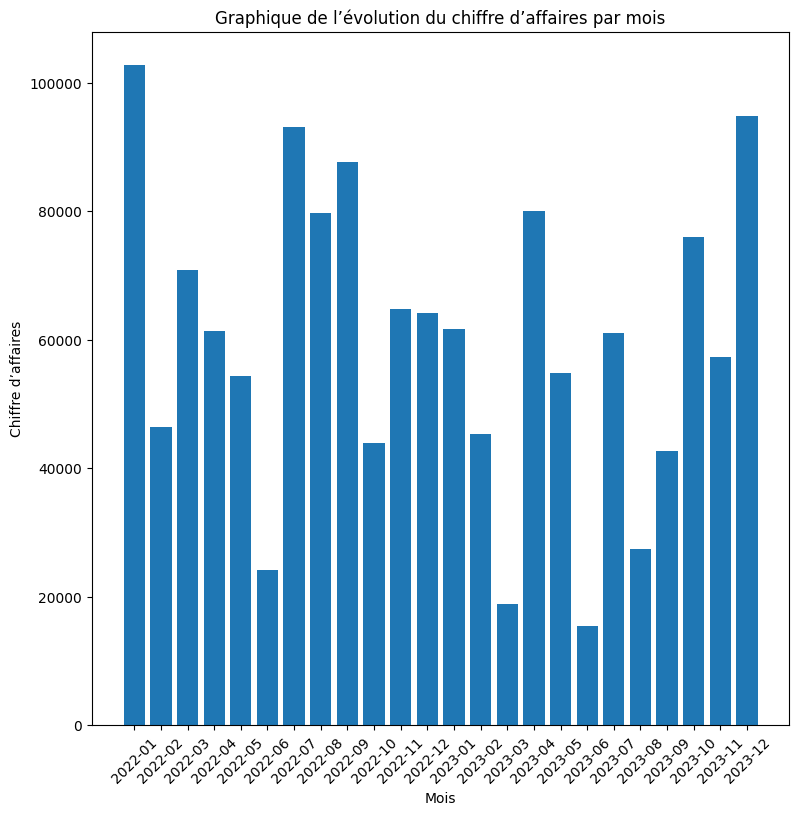

In [19]:
import matplotlib.pyplot as plt

df['mois'] = df['Date'].dt.to_period('M')
chiff_par_mois = df.groupby('mois', as_index=False)['ChiffreAffaires'].sum()

plt.figure(figsize=(9,9))
plt.bar(chiff_par_mois['mois'].astype(str), chiff_par_mois['ChiffreAffaires']) 
plt.title("Graphique de l’évolution du chiffre d’affaires par mois")
plt.xlabel("Mois")
plt.ylabel("Chiffre d’affaires")
plt.xticks(rotation=45)  
plt.show()


# Partie E : Analyses supplémentaires 

In [12]:
# 15. Identifier le magasin avec le plus grand chiffre d’affaires cumulé

magasin_plus_grand_chiff = df.groupby('Magasin')['ChiffreAffaires'].sum()
print("\nLe magasin avec le plus grand chiffre d’affaires cumulé est : ", magasin_plus_grand_chiff.idxmax())


# 16. Trouver le mois où les ventes (quantité) ont été les plus fortes

print("\n---------------------------------------------------")
mois_ventes_plus_fortes = df.groupby('mois', as_index=False)['Quantité'].sum()
print("\nle mois où les ventes (quantité) ont été les plus fortes : \n", mois_ventes_plus_fortes.idxmax())

# 17. Calculer le prix unitaire moyen par produit

print("\n---------------------------------------------------")
prix_unitaire_par_produit = df.groupby('Produit')['PrixUnitaire'].mean()
print("\nle prix unitaire moyen par produit (dh): \n",prix_unitaire_par_produit)

# 18. Afficher le top 3 des catégories qui génèrent le plus de ventes en volume (quantité)

print("\n---------------------------------------------------")
categ_plus_ventes = df.groupby('Catégorie')['Quantité'].sum()
print("\nAfficher le top 3 des catégories qui génèrent le plus de ventes en volume (quantité) : \n",categ_plus_ventes.head(3))

# 19. Analyser la répartition des ventes par jour de la semaine (CA total)

print("\n---------------------------------------------------")
df['jour'] = df['Date'].dt.day_name()
ventes_par_jour = df.groupby('jour')['Quantité'].sum()
print("\nla répartition des ventes par jour de la semaine : \n",ventes_par_jour)
print("\n*****En se basant sur les resultats le jour a le plus frequant ventes est : ",ventes_par_jour.idxmax())



Le magasin avec le plus grand chiffre d’affaires cumulé est :  Lyon

---------------------------------------------------

le mois où les ventes (quantité) ont été les plus fortes : 
 mois        23
Quantité    15
dtype: int64

---------------------------------------------------

le prix unitaire moyen par produit (dh): 
 Produit
Chaussures    639.017368
Fromage       692.164800
Laptop        698.736250
Pain          600.907857
Pantalon      630.053929
Smartphone    765.570000
T-shirt       813.896000
TV            674.315625
Name: PrixUnitaire, dtype: float64

---------------------------------------------------

Afficher le top 3 des catégories qui génèrent le plus de ventes en volume (quantité) : 
 Catégorie
Alimentaire     666
Mode            751
Électronique    614
Name: Quantité, dtype: int64

---------------------------------------------------

la répartition des ventes par jour de la semaine : 
 jour
Friday       284
Monday       289
Saturday     427
Sunday       273
Thursday   

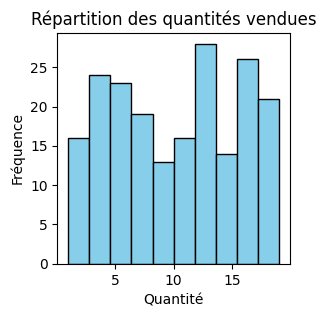

In [13]:
# 20. Créer un histogramme représentant la répartition des quantités vendues. 

plt.figure(figsize=(3,3))
plt.hist(df['Quantité'], bins=10, color='skyblue', edgecolor='black')
plt.title("Répartition des quantités vendues")
plt.xlabel("Quantité")
plt.ylabel("Fréquence")
plt.show()

# Exercice (Partie 2) : Traitement et modélisation avec Scikit-Learn 

### Partie F : Préparation des données

In [14]:
# 21. Sélectionner uniquement les colonnes utiles pour la modélisation 

colonne_utile = ['Quantité',
                 'PrixUnitaire',
                 'Catégorie',
                 'Magasin',
                 'ChiffreAffaires'
                ]

new_df = df[colonne_utile]

print(new_df)

     Quantité  PrixUnitaire     Catégorie    Magasin  ChiffreAffaires
0          10       1009.00          Mode       Lyon         10090.00
1           2        782.86  Électronique      Paris          1565.72
2          19       1159.62          Mode   Bordeaux         22032.78
3           9        782.64  Électronique   Bordeaux          7043.76
4           7       1279.01          Mode  Marseille          8953.07
..        ...           ...           ...        ...              ...
195        17       1122.68   Alimentaire   Bordeaux         19085.56
196         8        756.57   Alimentaire       Lyon          6052.56
197         2        352.16  Électronique       Lyon           704.32
198         8       1349.86          Mode   Bordeaux         10798.88
199         7        578.92  Électronique  Marseille          4052.44

[200 rows x 5 columns]


In [15]:
from sklearn.preprocessing import OneHotEncoder

colonnes_cat = ['Catégorie', 'Magasin']

encoder = OneHotEncoder(sparse_output=False, drop='first') 

# Extraire les colonnes catégorielles
X_cat = new_df[colonnes_cat]

# Transformer
X_encoded = encoder.fit_transform(X_cat)

# Créer DataFrame avec colonnes encodées

df_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(colonnes_cat))

# Garder les colonnes numériques
df_num = new_df.drop(columns=colonnes_cat)

# Fusionner
df_final = pd.concat([df_num.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

print(df_final.head())


   Quantité  PrixUnitaire  ChiffreAffaires  Catégorie_Mode  \
0        10       1009.00         10090.00             1.0   
1         2        782.86          1565.72             0.0   
2        19       1159.62         22032.78             1.0   
3         9        782.64          7043.76             0.0   
4         7       1279.01          8953.07             1.0   

   Catégorie_Électronique  Magasin_Lyon  Magasin_Marseille  Magasin_Paris  
0                     0.0           1.0                0.0            0.0  
1                     1.0           0.0                0.0            1.0  
2                     0.0           0.0                0.0            0.0  
3                     1.0           0.0                0.0            0.0  
4                     0.0           0.0                1.0            0.0  


In [22]:
# 23. Séparer les données en X (features) et y (target)

X = df_final.drop(columns=['ChiffreAffaires'])
y = df_final['ChiffreAffaires']


In [23]:
# 24. Découper le dataset en jeu d’entraînement et jeu de test (train_test_split)
from sklearn.model_selection import train_test_split

# Découpage en 80% entraînement et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Partie G : Régression (prédiction du Chiffre d’Affaires)

In [31]:
# 25.Entraîner un modèle de régression linéaire pour prédire ChiffreAffaires à partir de Quantité, PrixUnitaire, Catégorie, Magasin

from sklearn.linear_model import LinearRegression

# print(X_train.dtypes)

model = LinearRegression()
model.fit(X_train, y_train)

# faire predictions

y_pred = model.predict(X_test)
print("Pred : ",y_pred[:4])
print("real values : ",y_test.values[:4])

Pred :  [-2757.92250841  5748.09478757 18375.87385273 18219.78543097]
real values :  [  963.33  3550.96 22244.   19304.87]


In [33]:
# 26. Évaluer la performance du modèle. (Score)

from sklearn.metrics import r2_score, mean_squared_error

R2 = r2_score(y_test,y_pred)
print("R2 = ",R2)

Mse = mean_squared_error(y_test, y_pred)
print("MSE = ", Mse)

R2 =  0.8559820991792013
MSE =  6153518.982924463


In [36]:
# 27. Tester une autre méthode (ex. RandomForestRegressor) et comparer les résultats

from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

R2 = r2_score(y_test,y_pred2)
print("R2 = ",R2)

Mse = mean_squared_error(y_test, y_pred2)
print("MSE = ", Mse)


R2 =  0.9818903873730691
MSE =  773777.7348379057
